In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 35/2 #35
t_label = 25/2 #25
fig_width = 15/2 #15
#'black', 'dimgrey', 'dimgray', 'grey', 'gray', 'darkgrey', 'darkgray', ## 'silver', 'lightgrey', 'lightgray'
#'rosybrown','lightcoral', 'indianred', 'firebrick', 'brown', 'darkred', 'red'
colors = ['black','dimgrey','grey','darkgrey','lightgrey','rosybrown','lightcoral','indianred','firebrick','darkred','brown','red']

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
print(len(colors)==len(exp))

True


### - les premier essais après le switch

In [6]:
# liste de tout
full_proba = [[],[],[],[],[]]
full_bino = [[],[],[],[],[]]
full_results = [[],[],[],[],[]]

# listes de tout par sujet
proba_sujet = [[],[],[],[],[]]
bino_sujet = [[],[],[],[],[]]
results_sujet = [[],[],[],[],[]]

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    
    liste_proba = [[],[],[],[],[]]
    liste_bino = [[],[],[],[],[]]
    liste_results = [[],[],[],[],[]]
    
    badabada = [0, 1, 2, 3, 4]
    
    for block in range(N_blocks):
        
        switch = []
        for s in range(N_trials):
            if s in [0,50,100,150] :
                switch.append(s)
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)
        
        for s1 in range(len(switch)-1) :
            
            for a in badabada :

                for trial in np.arange(switch[s1]+5*a, switch[s1+1]) :
                    full_proba[a].append(p[trial, block, 1])
                    full_bino[a].append(p[trial, block, 0])
                    full_results[a].append(results[trial, block])

                    liste_proba[a].append(p[trial, block, 1])
                    liste_bino[a].append(p[trial, block, 0])
                    liste_results[a].append(results[trial, block])
                
                
    for b in range(len(liste_proba)) :                      
        proba_sujet[b].append(liste_proba[b])
        bino_sujet[b].append(liste_bino[b])
        results_sujet[b].append(liste_results[b])

In [7]:
print(switch)

[0, 17, 38, 50, 100, 150, 155, 190, 200]


In [8]:
nb_sujet = len(proba_sujet[0])
nb_suppression = len(proba_sujet)
liste_suppression = ['', '- 5', '- 10', '- 15', '- 20']

## Probabilité réel

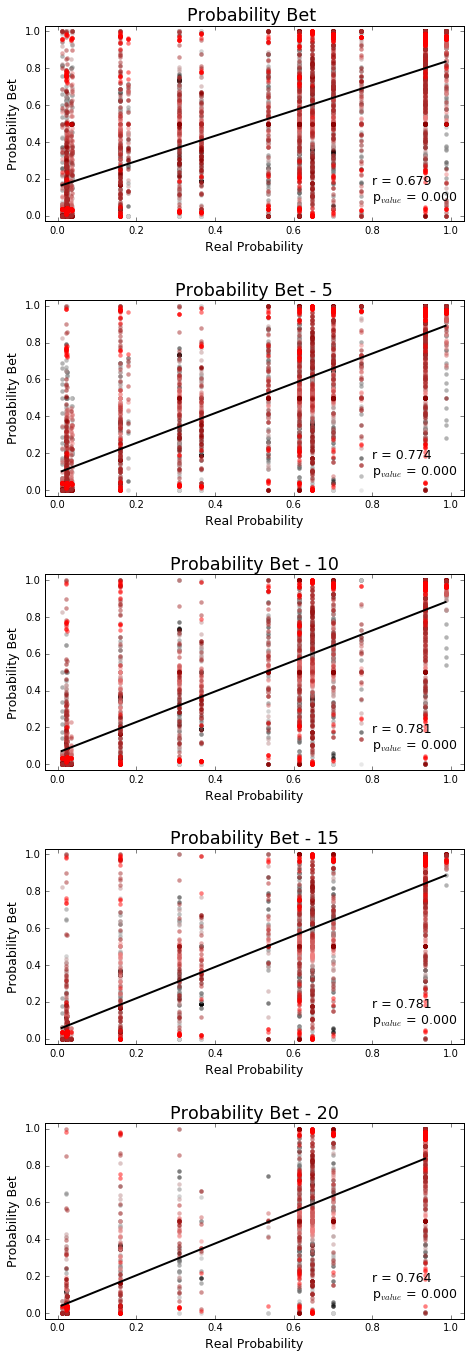

In [9]:
fig, axs = plt.subplots(nb_suppression, 1, figsize=(fig_width*1, (fig_width*nb_suppression)/1.6180))
plt.subplots_adjust(hspace=0.4)

for a, nom in enumerate(liste_suppression) :

    proba = full_proba[a]
    proba_s = proba_sujet[a]

    axs[a].set_ylabel('Probability Bet', fontsize=t_label)
    sujet = results_sujet[a]
    full = full_results[a]
    y_1 = -0.032
    y_2 = 1.032

    for x, color in enumerate(colors[:len(proba_sujet[0])]):
        axs[a].scatter(proba_s[x], sujet[x], c=color, alpha=0.5, linewidths=0)

    slope, intercept, r_value, p_value, std_err = stats.linregress(proba, full)
    x_test = np.linspace(np.min(proba), np.max(proba), 100)
    fitLine = slope * x_test + intercept
    axs[a].plot(x_test, fitLine, c='k', linewidth=2)
    axs[a].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_value, p_value), fontsize=t_label)
        
    axs[a].axis([-0.032, 1.032, y_1, y_2])

    axs[a].set_title("Probability Bet %s"%(nom), fontsize=t_titre)
    axs[a].set_xlabel('Real Probability', fontsize=t_label)

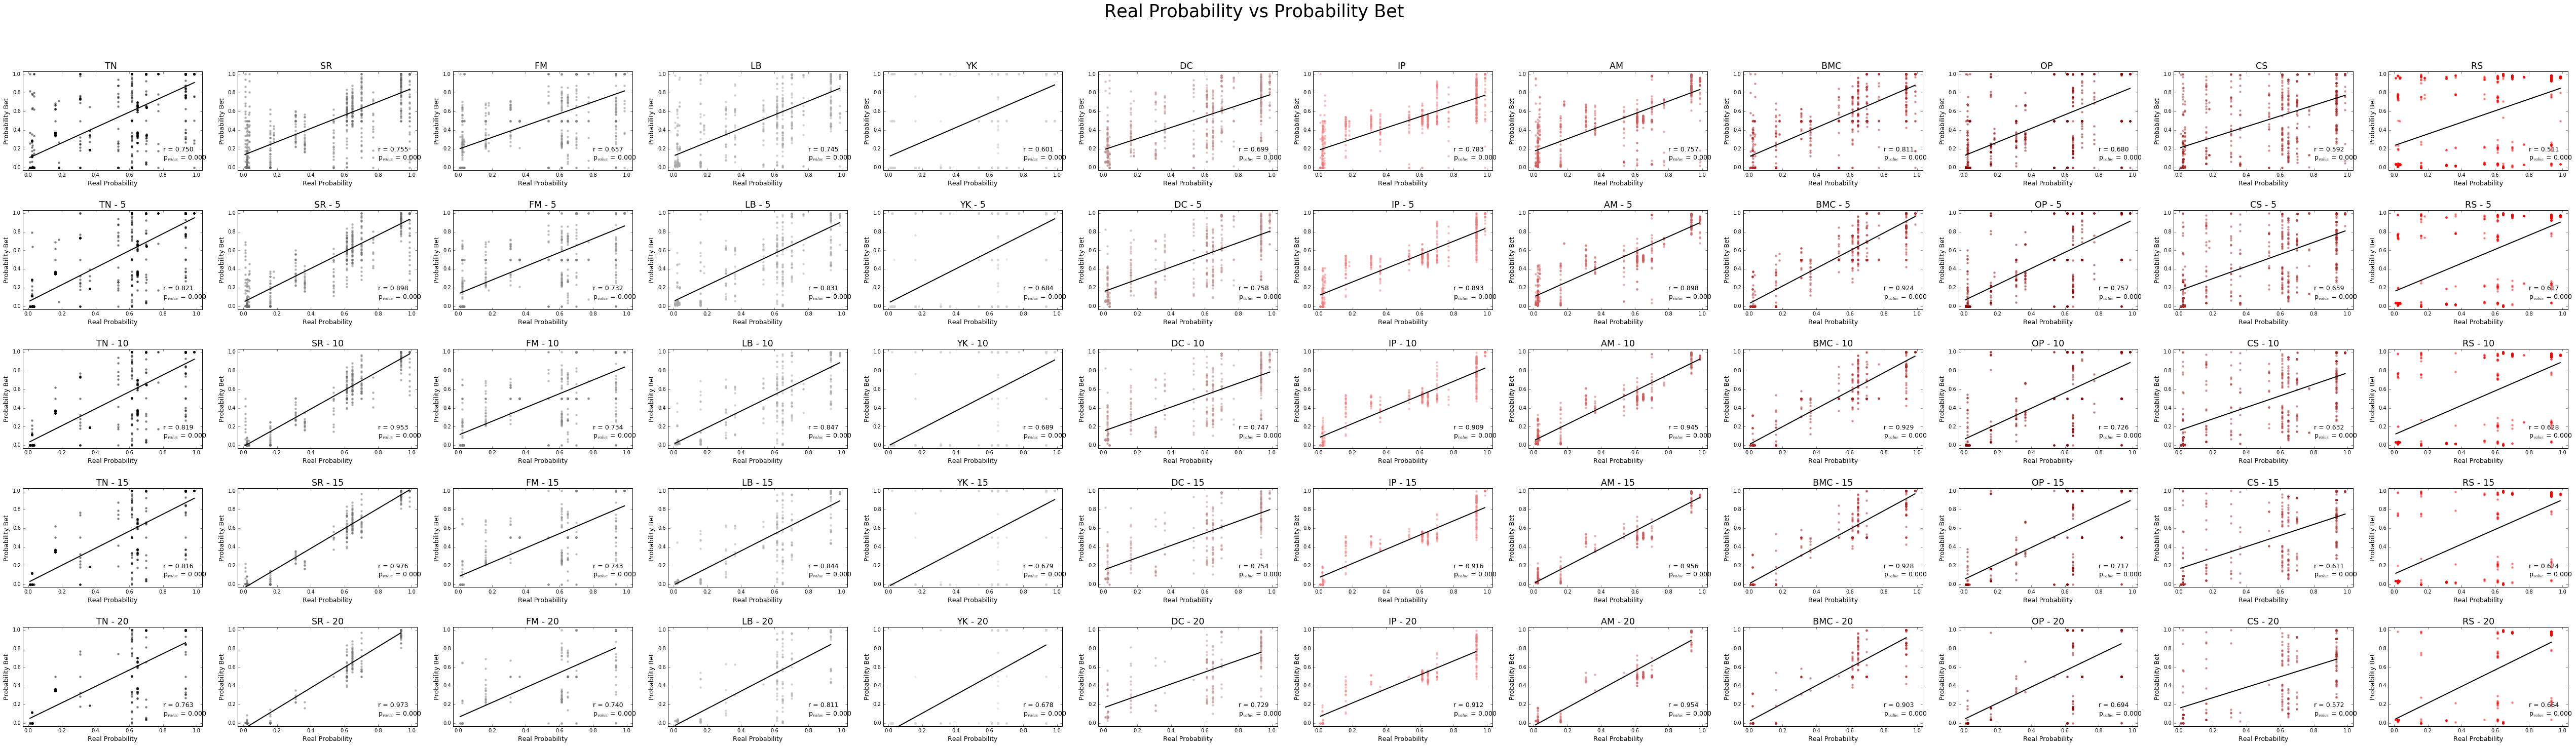

In [10]:
fig, axs = plt.subplots(nb_suppression, nb_sujet, figsize=(fig_width*nb_sujet, (fig_width*nb_suppression)/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Probability Bet", fontsize=t_titre*2)

for x, color in enumerate(colors[:nb_sujet]):

    for a, nom in enumerate(liste_suppression) :

        pro = proba_sujet[a][x]
        par = results_sujet[a][x]
        axs[a][x].scatter(pro, par, c=color, alpha=0.5, linewidths=0)


        slope, intercept, r_value, p_value, std_err = stats.linregress(pro, par)
        x_test = np.linspace(np.min(pro), np.max(pro), 100)

        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f \np$_{value}$ = %0.3f '%(r_value, p_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, -0.032, 1.032])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('Probability Bet', fontsize=t_label)